# Atividade 01

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [11]:
#a)
# Definindo a matriz de transformação
T = np.array([[0.5, 0.5],
              [0.5, -0.5]])

# Multiplicando a matriz de transformação pelos dados originais para obter os dados transformados
dados_transformados = np.dot(df.values, T)

# Criando um DataFrame com os dados transformados
df_transformado = pd.DataFrame(dados_transformados, columns=['media', 'diferenca'])

# Criando uma tabela bonita
tabela = PrettyTable()
tabela.field_names = ['Media', 'Diferenca']
for row in df_transformado.head().itertuples(index=False):
    tabela.add_row(row)

# Mostrando a tabela bonita
print(tabela)

+--------------------+---------------------+
|       Media        |      Diferenca      |
+--------------------+---------------------+
| 7.454059858947289  | -0.4893680029686731 |
| 3.9804650187527706 | -1.1190716692489762 |
| 1.6214718740614065 |  0.6470426615806244 |
| 4.993753585726436  |  0.5193941051024766 |
| 8.066545810417097  | -0.8718561125614657 |
+--------------------+---------------------+


In [12]:
#b)
# Calculando a correlação entre p1 e p2 nos dados originais
correlacao_original = df['p1'].corr(df['p2'])
print("Correlação entre p1 e p2:", correlacao_original)

Correlação entre p1 e p2: 0.8957365818728046


In [13]:
#c)
# Calculando a correlação entre a média e a diferença nos dados transformados
correlacao_transformada = df_transformado['media'].corr(df_transformado['diferenca'])
print("Correlação entre média e diferença:", correlacao_transformada)

Correlação entre média e diferença: -0.13347385411788837


d)

- A correlação entre p1 e p2 é 0,89, o que significa que há uma forte relação linear positiva entre as duas variáveis.

- A correlação entre os dados transformados (média e diferença) é -0,13, o que significa que a transformação reduziu a correlação entre os dados originais.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

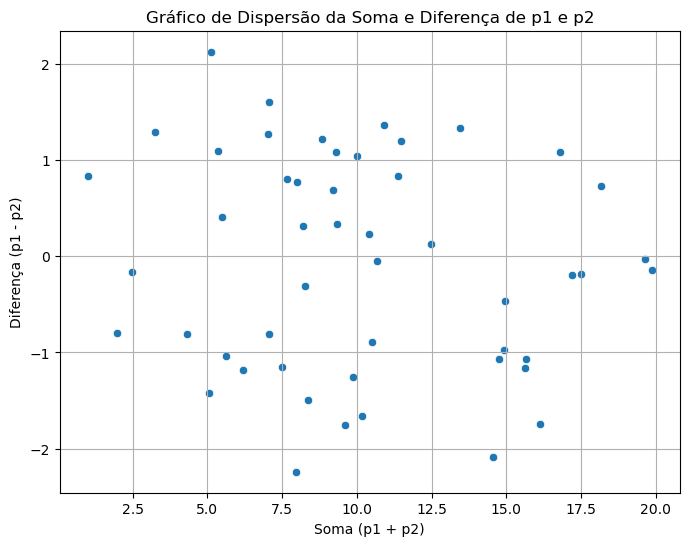

In [14]:
# Definindo a matriz de transformação para obter a soma e a diferença
T_soma_dif = np.array([[1, 1],
                       [1, -1]])

# Multiplicando a matriz de transformação para obter a soma e a diferença entre p1 e p2
dados_transformados_soma_dif = np.dot(df.values, T_soma_dif)

# Criando um DataFrame com os dados transformados
df_transformado_soma_dif = pd.DataFrame(dados_transformados_soma_dif, columns=['soma', 'diferenca'])

# Construindo o gráfico de dispersão para visualizar as diferenças
plt.figure(figsize=(8, 6))
sns.scatterplot(x='soma', y='diferenca', data=df_transformado_soma_dif)
plt.title('Gráfico de Dispersão da Soma e Diferença de p1 e p2')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.grid(True)
plt.show()

- O gráfico (média e diferença) mostra um padrão aleatório, indicando nenhuma correlação. Isso mostra que a transformação mudou a forma e a distribuição dos dados.